In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('googleplaystore.csv')

In [3]:
df.shape

(10841, 13)

In [4]:
df.head (5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# Check for null values in the data. Get the number of null values for each column.
df.isnull().sum ()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# Drop records with nulls in any of the columns.
df = df.dropna()

In [8]:
# new shape after the drop
df.shape 

(9360, 13)

In [9]:
# Drop records with nulls in any of the columns check 
df.isnull().sum ()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [10]:
df = df[df.Size != 'Varies with device']

In [11]:
# Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
# Extract the numeric value from the column
# multiply the value by 1,000, if size is mentioned in Mb

def MtoK(b):
    if b[len(b) -1: ] == 'M':
        return(float(b[0: len(b) -1 ])*1000)
    elif b[len(b) -1: ] == 'K' or  b[len(b) -1: ] == 'k':
        return(float(b[0: len(b) -1 ]))
    else:
        return b

In [12]:
df.Size = df.Size.apply(MtoK)

In [13]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   object 
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   object 
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   object 
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(2), object(11)
memory usage: 844.7+ KB


In [14]:
df.Size

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10833      619.0
10834     2600.0
10836    53000.0
10837     3600.0
10840    19000.0
Name: Size, Length: 7723, dtype: float64

In [15]:
df = df[df.Size != 'Varies with device']

In [16]:
df.shape

(7723, 13)

In [17]:
# 4.2 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
#converts to int

df ["Reviews"] = df ['Reviews'].astype ("int64")

In [18]:
df ["Reviews"].dtype 

dtype('int64')

In [19]:
# installs field has values loaded as string 
# convert the values into integer 
# also remove the signs "+" and ","

def remove_char(val):
    return(int(val.replace(',','').replace('+','')))

In [20]:
df.Installs = df.Installs.map (remove_char)

In [21]:
df.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7723, dtype: int64

In [22]:
# Price field is a string and has $ symbol. Remove ‘$’ sign, 
# and convert it to numeric.

def remove_symbol(val):
    return(float(val.replace("$", "")))

In [23]:
df.Price = df.Price.apply(remove_symbol)

In [24]:
df ["Price"].dtype

dtype('float64')

In [25]:
df.Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10833    0.0
10834    0.0
10836    0.0
10837    0.0
10840    0.0
Name: Price, Length: 7723, dtype: float64

In [26]:
df.shape

(7723, 13)

In [27]:
# sanity check
# the rating of the aap should be between 1 and 5 only. values outside these range should be dropped.

In [28]:
# Way 1 to check
df[(df.Rating <1) | (df.Rating>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [29]:
# Way 2 to check
df.loc[df.Rating < 1] & df.loc[df.Rating > 5]
# Result : no rating is out side the range

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [30]:
# reviews should not be more than the installs 
# only those who have downloaded the app should give reviews
# if there are any such records drop such records.

In [31]:
df.loc[df.Reviews > df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [32]:
df.loc[df.Reviews > df.Installs].describe ()

,Rating,Reviews,Size,Installs,Price
count,6.0,6.000000,6.000000,6.000000,6.000000
mean,5.0,7.666667,15050.000000,4.666667,0.413333
std,0.0,6.947422,8219.914841,4.412105,0.659566
min,5.0,2.000000,4200.000000,1.000000,0.000000
25%,5.0,2.500000,8575.000000,1.000000,0.000000
50%,5.0,5.500000,17500.000000,3.000000,0.000000
75%,5.0,10.000000,19750.000000,8.750000,0.742500
max,5.0,20.000000,25000.000000,10.000000,1.490000


In [33]:
df.loc[df.Reviews > df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [34]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [35]:
df[['Reviews','Installs']]

,Reviews,Installs
0,159,10000
1,967,500000
2,87510,5000000
3,215644,50000000
4,967,100000
...,...,...
10833,44,1000
10834,7,500
10836,38,5000
10837,4,100


In [36]:
# Created a column to easily identify results for the syntax
df['RAI'] = np.where((df['Reviews'] <= df['Installs']), df['Installs'], np.nan)

In [37]:
df['RAI'].shape

(7723,)

In [38]:
df['RAI'].describe()

count    7.717000e+03
mean     8.430620e+06
std      5.017636e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: RAI, dtype: float64

In [39]:
df = df.dropna()

In [40]:
# Still have 14 columns and need to drop RAI
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'RAI'],
      dtype='object')

In [41]:
# to drop RAI column
df = df.drop(['RAI'], axis = 1)

In [42]:
df.shape

(7717, 13)

In [43]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [44]:
# 5.3 For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [45]:
# To determine the rows with Price above $0
df.loc[df.Price > 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.0,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.0,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
477,Calculator,DATING,2.6,57,6200.0,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,Fruit Ninja Classic,GAME,4.3,85468,36000.0,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up
10690,FO Bixby,PERSONALIZATION,5.0,5,861.0,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.0,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11000.0,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


In [46]:
# check to confirm any free app with Price > 0
df[np.logical_and(df['Type'] == 'Free', df['Price'] > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [47]:
#Performing univariate analysis: 
#Boxplot for Price
#Are there any outliers? Think about the price of usual apps on Play Store.

{'whiskers': [<matplotlib.lines.Line2D at 0x22546ffcc40>,
 'caps': [<matplotlib.lines.Line2D at 0x22546ffd180>,
 'boxes': [<matplotlib.lines.Line2D at 0x22546fbf850>],
 'medians': [<matplotlib.lines.Line2D at 0x22546ffd6c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22546ffd960>],
 'means': []}

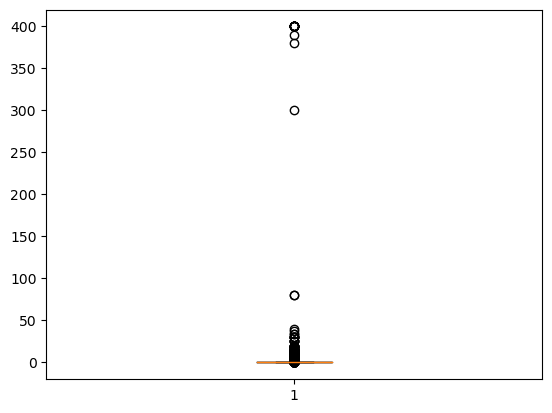

In [48]:
plt.boxplot(df['Price'])
# most app prices are less that $100
# some outlier prices above $200

In [49]:
df['Price'].describe()

count    7717.000000
mean        1.128725
std        17.414784
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x22547119270>,
 'caps': [<matplotlib.lines.Line2D at 0x225471197b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22547118fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x22547119cf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22547119f90>],
 'means': []}

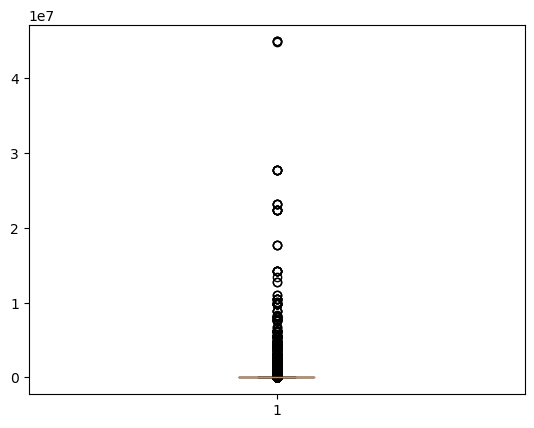

In [50]:
#Boxplot for Reviews
#Are there any apps with very high number of reviews? Do the values seem right?

plt.boxplot(df['Reviews'])

In [51]:
#Histogram for Rating
#How are the ratings distributed? Is it more toward higher ratings?

df['Reviews'].describe()

count    7.717000e+03
mean     2.951275e+05
std      1.864640e+06
min      1.000000e+00
25%      1.090000e+02
50%      2.351000e+03
75%      3.910900e+04
max      4.489389e+07
Name: Reviews, dtype: float64

(array([  17.,   18.,   39.,   72.,  132.,  408.,  781., 1406., 3212.,
        1632.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

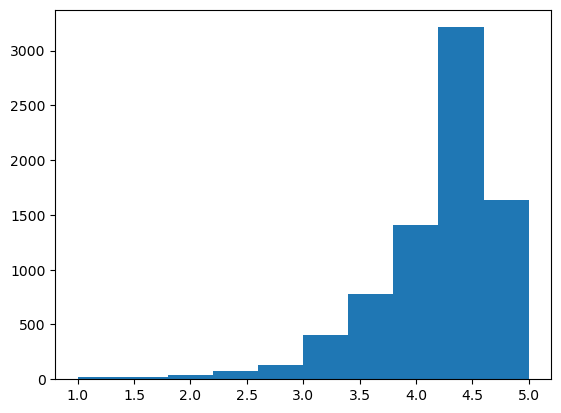

In [52]:
plt.hist(df['Rating'])

(array([3245., 1398.,  991.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

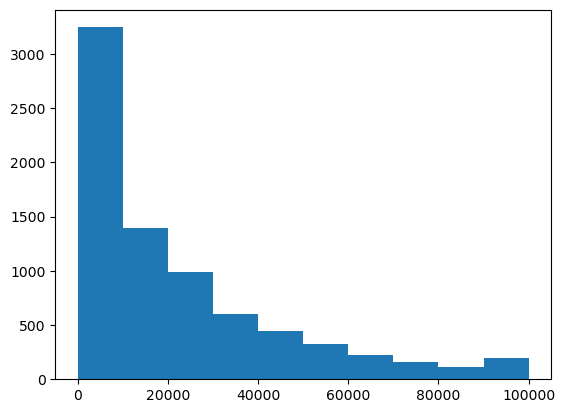

In [53]:
plt.hist(df['Size'])

In [54]:
# To determine the rows with Price above $100 
# for my DF, I assume any app price greater than $100 is too high and should be dropped(outlier)
df.loc[df.Price > 100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [55]:
# Second check and same result
df[df.Price>100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [56]:
df[df.Price>100].shape
# 15 rows with outlier prices 

(15, 13)

In [57]:
#df shape before the drop
df.shape

(7717, 13)

In [58]:
#df shape after the drop
df[df.Price <=100].shape

(7702, 13)

In [59]:
df = df[df.Price <=100]

In [60]:
#new df after the dropp
df.shape

(7702, 13)

In [61]:
# now df has all the required conditions on price, Reviews, Rating and Isntalls
df.describe()

,Rating,Reviews,Size,Installs,Price
count,7702.000000,7.702000e+03,7702.000000,7.702000e+03,7702.000000
mean,4.173890,2.957011e+05,23004.020709,8.447011e+06,0.368802
std,0.544481,1.866409e+06,23466.178824,5.022383e+07,2.348127
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.090000e+02,5300.000000,1.000000e+04,0.000000
50%,4.300000,2.374500e+03,14000.000000,1.000000e+05,0.000000
75%,4.500000,3.949125e+04,33000.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,100000.000000,1.000000e+09,79.990000


In [62]:
# very few apps ahve very high number of reviews
# they wont help with the analysis and futher skew the data
# drop records having more than 2 million reviewa

In [63]:
df["Reviews"].describe()

count    7.702000e+03
mean     2.957011e+05
std      1.866409e+06
min      1.000000e+00
25%      1.090000e+02
50%      2.374500e+03
75%      3.949125e+04
max      4.489389e+07
Name: Reviews, dtype: float64

In [64]:
# rows with reviews more tha 2 million
df.loc[df.Reviews > 2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4187998,16000.0,100000000,Free,0.0,Everyone,Communication,"July 18, 2018",5.29.3,4.4 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648120,3300.0,100000000,Free,0.0,Teen,Communication,"July 18, 2018",11.4.0,4.0 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.0,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,Need for Speed™ No Limits,GAME,4.4,3344300,22000.0,50000000,Free,0.0,Everyone 10+,Racing,"July 24, 2018",2.12.1,4.1 and up
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [65]:
# second check
df[df.Reviews > 2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4187998,16000.0,100000000,Free,0.0,Everyone,Communication,"July 18, 2018",5.29.3,4.4 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648120,3300.0,100000000,Free,0.0,Teen,Communication,"July 18, 2018",11.4.0,4.0 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.0,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,Need for Speed™ No Limits,GAME,4.4,3344300,22000.0,50000000,Free,0.0,Everyone 10+,Racing,"July 24, 2018",2.12.1,4.1 and up
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [66]:
# 219 rows to be dropped
df[df.Reviews > 2000000].shape

(219, 13)

In [67]:
df.shape

(7702, 13)

In [68]:
# new df
df = df[df.Reviews <= 2000000]

In [69]:
df.shape

(7483, 13)

In [70]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,7483.000000,7.483000e+03,7483.000000,7.483000e+03,7483.000000
mean,4.165789,7.260651e+04,22027.284177,3.947465e+06,0.379595
std,0.549946,2.123720e+05,22582.977041,2.781831e+07,2.381384
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,9.900000e+01,5100.000000,1.000000e+04,0.000000
50%,4.300000,2.026000e+03,14000.000000,1.000000e+05,0.000000
75%,4.500000,3.238600e+04,31000.000000,1.000000e+06,0.000000
max,5.000000,1.986068e+06,100000.000000,1.000000e+09,79.990000


In [71]:
df["Installs"].describe()

count    7.483000e+03
mean     3.947465e+06
std      2.781831e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [72]:
np.arange(0,1,0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [73]:
# to get precentiles by 0.05
df["Installs"].quantile(q = np.arange(0,1,0.05))

0.00           5.0
0.05         100.0
0.10        1000.0
0.15        1000.0
0.20        5000.0
0.25       10000.0
0.30       10000.0
0.35       10000.0
0.40       50000.0
0.45      100000.0
0.50      100000.0
0.55      100000.0
0.60      500000.0
0.65     1000000.0
0.70     1000000.0
0.75     1000000.0
0.80     5000000.0
0.85     5000000.0
0.90    10000000.0
0.95    10000000.0
Name: Installs, dtype: float64

In [74]:
df["Installs"].quantile(0.99)

50000000.0

In [75]:
df.shape

(7483, 13)

In [76]:
# installs above 10000000 are outlier and should be dropped
df[df.Installs > 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
225,Secure Folder,BUSINESS,3.8,14760,8600.0,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
346,imo beta free calls and text,COMMUNICATION,4.3,659395,11000.0,100000000,Free,0.0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10378,BMX Boy,GAME,4.2,839206,12000.0,50000000,Free,0.0,Everyone,Racing,"September 20, 2017",1.16.33,4.1 and up
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27000.0,50000000,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000.0,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000.0,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up


In [77]:
# second check
df.loc[df.Installs > 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
225,Secure Folder,BUSINESS,3.8,14760,8600.0,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
346,imo beta free calls and text,COMMUNICATION,4.3,659395,11000.0,100000000,Free,0.0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10378,BMX Boy,GAME,4.2,839206,12000.0,50000000,Free,0.0,Everyone,Racing,"September 20, 2017",1.16.33,4.1 and up
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27000.0,50000000,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000.0,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000.0,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up


In [78]:
# new df without outlier
df[df.Installs <= 10000000].shape

(7307, 13)

In [79]:
df = df[df.Installs <= 10000000]

In [80]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,7307.000000,7.307000e+03,7307.000000,7.307000e+03,7307.000000
mean,4.162899,5.091109e+04,21687.801765,1.716009e+06,0.388738
std,0.555276,1.457407e+05,22460.971012,3.205978e+06,2.409159
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,9.100000e+01,5000.000000,1.000000e+04,0.000000
50%,4.300000,1.749000e+03,14000.000000,1.000000e+05,0.000000
75%,4.500000,2.755850e+04,30000.000000,1.000000e+06,0.000000
max,5.000000,1.736105e+06,100000.000000,1.000000e+07,79.990000


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

form the plot below, rating does not increase with price


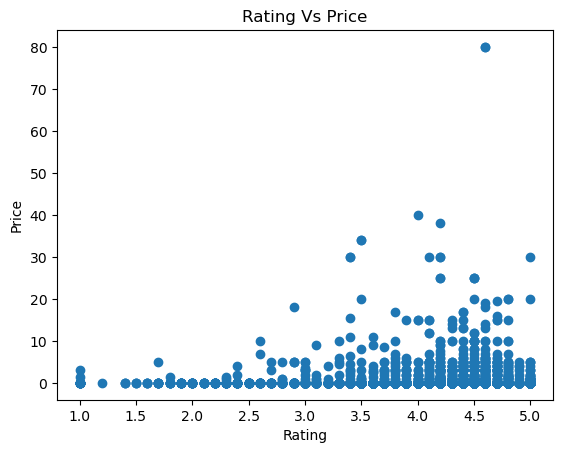

In [82]:
# Make scatter plot/joinplot for Rating vs. Price
# What pattern do you observe? Does rating increase with price?

#plt.scatter(x,y)

#x --> Rating
#y --> Price

import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df['Rating'], df['Price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Rating Vs Price')
print('form the plot below, rating does not increase with price')


from the plot, lighter apps have less ratings than the heavier apps and are l


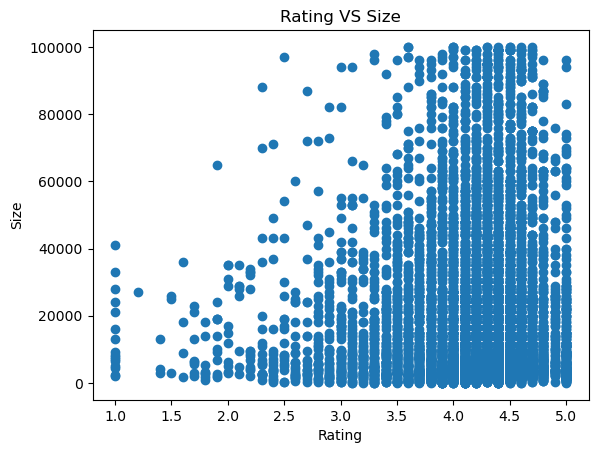

In [83]:
# make scatter plot/jointplot for rating Vs Size
# are hevier apps better

plt.scatter(df["Rating"], df["Size"])
plt.xlabel("Rating")
plt.ylabel("Size")
plt.title("Rating VS Size")
print("from the plot, lighter apps have less ratings than the heavier apps and are l")

From the plot below, it appears that rating does not necessarily increase with price.


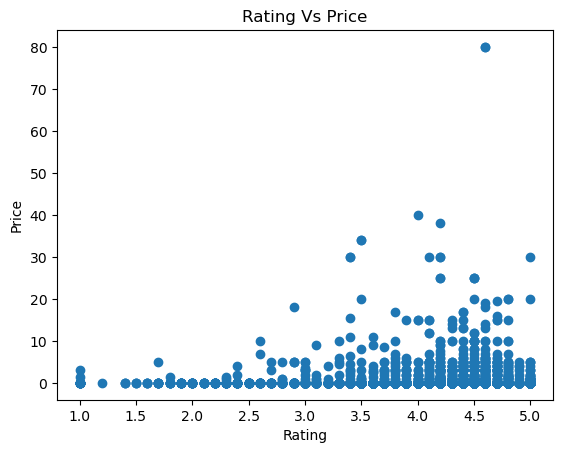

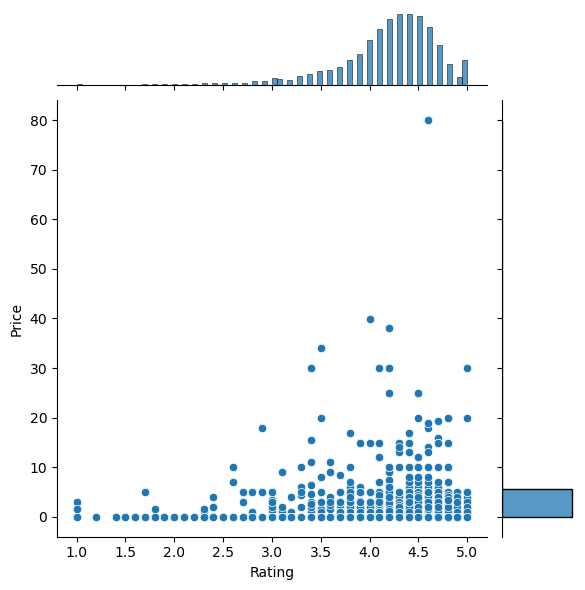

In [87]:
# make sactterplot for Rating VS Reviews
# Does more review mean a better rating
#plt.scatter(x,y)

#x --> Rating
#y --> Reviews

import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(df['Rating'], df['Price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Rating Vs Price')

# Create a data frame from the two Series
data = pd.DataFrame({'Rating': df['Rating'], 'Price': df['Price']})

# Use sns.jointplot with the data frame
sns.jointplot(data=data, x='Rating', y='Price')

print("From the plot below, it appears that rating does not necessarily increase with price.")




From the plot, it appears that lighter apps tend to have fewer ratings than heavier apps and are likely to be rated lower.


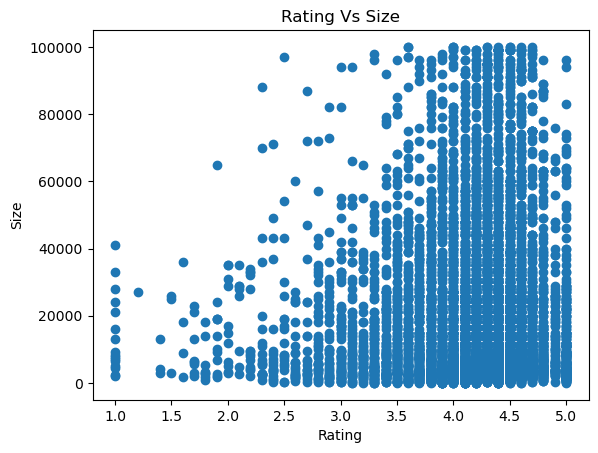

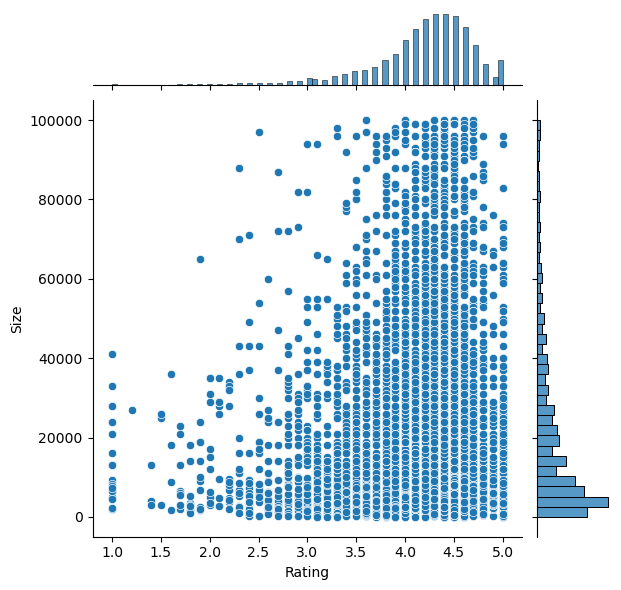

In [90]:
# make boxplot for Rating VS Content rating
# Is there any difference in the ratings? Are some types liked better?

#7.2 Make scatter plot/joinplot for Rating vs. Size
# Are heavier apps rated better?

plt.scatter(df['Rating'], df['Size'])
plt.xlabel('Rating')
plt.ylabel('Size')
plt.title('Rating Vs Size')

# Create a data frame from the two Series
data = pd.DataFrame({'Rating': df['Rating'], 'Size': df['Size']})

# Use sns.jointplot with the data frame
sns.jointplot(data=data, x='Rating', y='Size')

print("From the plot, it appears that lighter apps tend to have fewer ratings than heavier apps and are likely to be rated lower.")


From the plot, it appears that lighter apps tend to have fewer ratings than heavier apps and are likely to be rated lower.


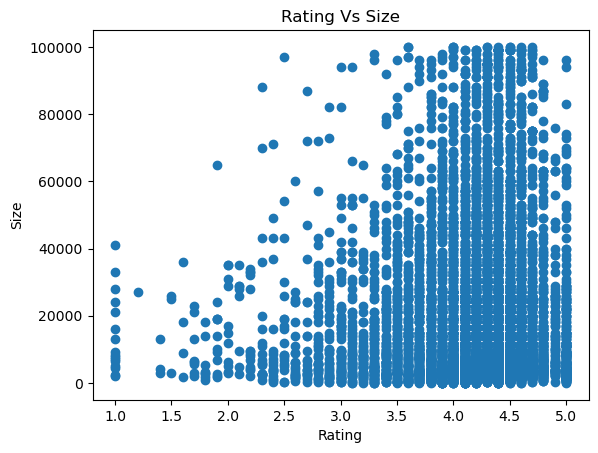

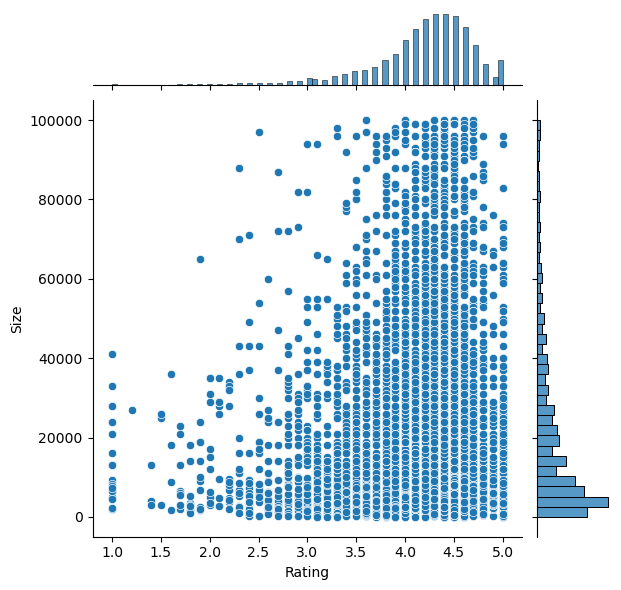

In [92]:
# 7.3 Make scatter plot/joinplot for Rating vs. Reviews
# Does more review mean a better rating always?

#plt.scatter(x,y)

#x --> Rating
#y --> Reviews

plt.scatter(df['Rating'], df['Size'])
plt.xlabel('Rating')
plt.ylabel('Size')
plt.title('Rating Vs Size')

# Create a data frame from the two Series
data = pd.DataFrame({'Rating': df['Rating'], 'Size': df['Size']})

# Use sns.jointplot with the data frame
sns.jointplot(data=data, x='Rating', y='Size')

print("From the plot, it appears that lighter apps tend to have fewer ratings than heavier apps and are likely to be rated lower.")



Apps with a 'Teen' Content Rating are generally rated higher than others, while the apps with an 'Everyone' rating show a large variance in rating.


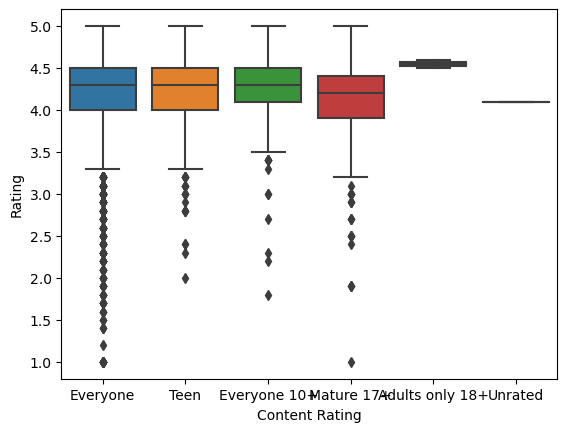

In [94]:
# 7.4 Make boxplot for Rating vs. Content Rating
# Is there any difference in the ratings? Are some types liked better?

sns.boxplot(x=df['Content Rating'], y=df['Rating'])
print("Apps with a 'Teen' Content Rating are generally rated higher than others, while the apps with an 'Everyone' rating show a large variance in rating.")


Apps in the 'Parenting' and 'Events' categories tend to show the highest ratings.


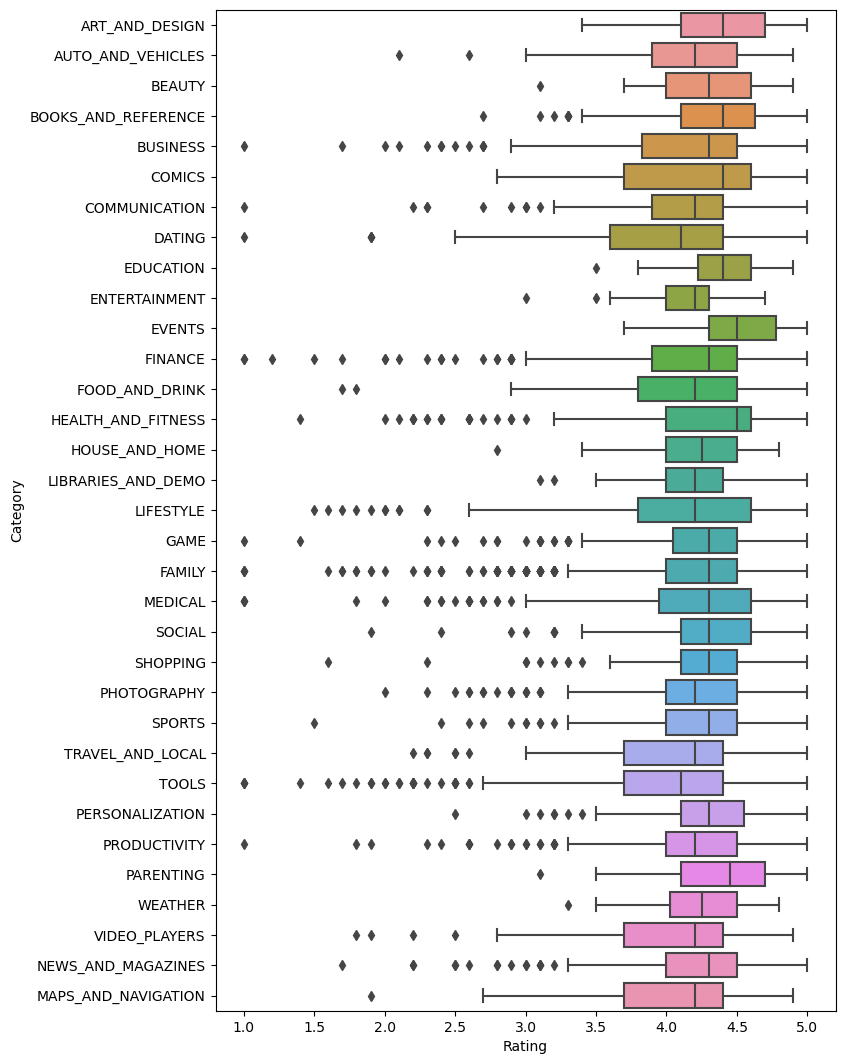

In [102]:
#Make boxplot for Ratings vs. Category
# Which genre has the best ratings?

fig, axis = plt.subplots(figsize=(8, 13))
sns.boxplot(x=df['Rating'], y=df['Category'])
print("Apps in the 'Parenting' and 'Events' categories tend to show the highest ratings.")


In [103]:
# 8 For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

inp1 = df.copy().reset_index()

In [105]:
# 8.1  Reviews and Install have some values that are still relatively very high. 
# Before building a linear regression model, you need to reduce the skew. 
# Apply log transformation (np.log1p) to Reviews and Installs.

inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])
inp1['Size'] = np.log1p(inp1['Size'])

In [107]:
# 8.2 Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

inp1.drop(columns = ['index', 'App', 'Last Updated', 'Current Ver', 'Android Ver'], axis = 1, inplace = True)


In [108]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [109]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,9.852247,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,9.546884,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,9.071193,15.424949,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.3,6.875232,7.937732,11.512935,Free,0.0,Everyone,Art & Design;Creativity
4,ART_AND_DESIGN,4.4,5.123964,8.630700,10.819798,Free,0.0,Everyone,Art & Design


In [110]:
inp1.shape

(7307, 9)